In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mne import read_epochs
from sklearn.preprocessing import LabelEncoder
from jupyterthemes.stylefx import set_nb_theme
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
set_nb_theme('gruvboxd')

In [2]:
epochs = read_epochs('nirs_epo.fif')

Reading C:\Users\Alberto\Documents\BCI\data\esn\nirs_epo.fif ...
    Found the data of interest:
        t =   -4992.00 ...   19968.00 ms
        0 CTF compensation matrices available
Not setting metadata
82 matching events found
No baseline correction applied
0 projection items activated


In [3]:
epochs['rest','left']

Number of events,33
Events,left: 17rest: 16
Time range,-4.992 – 19.968 sec
Baseline,-3.000 – 0.000 sec


In [4]:
data = epochs['left','rest'].copy().crop(5,12).to_data_frame()


In [5]:
data

,time,condition,epoch,S1_D1 hbo,S1_D1 hbr,S1_D3 hbo,S1_D3 hbr,S2_D2 hbo,S2_D2 hbr,S2_D3 hbo,...,S7_D3 hbo,S7_D3 hbr,S7_D4 hbo,S7_D4 hbr,S8_D1 hbo,S8_D1 hbr,S8_D3 hbo,S8_D3 hbr,S8_D4 hbo,S8_D4 hbr
0,4.992,rest,1,8.663938,-1.340037,-177.022754,53.407828,14.000646,-1.593021,5.456252,...,11.400105,-4.547774,11.799848,-0.212744,-772.057974,950.677146,0.009286,2.989862,-29.640669,57.904930
1,5.120,rest,1,9.293909,-1.757803,-142.494027,9.061106,13.946174,-0.521755,7.073002,...,14.450085,-6.434850,12.146626,-0.399491,-702.577003,855.864200,1.811637,2.558807,-59.228965,95.568044
2,5.248,rest,1,9.568425,-1.852715,-104.015999,-22.083581,12.069114,1.496822,7.912436,...,15.944148,-7.356712,11.610147,-0.151924,-507.729419,636.367011,3.488719,2.177439,-80.803693,118.273187
3,5.376,rest,1,9.666059,-1.632914,-87.892571,-9.860999,9.124642,4.021137,7.908150,...,16.204993,-7.228287,10.456503,0.392273,-281.450571,392.466696,4.818848,2.108133,-90.114037,121.890298
4,5.504,rest,1,9.741429,-1.206569,-109.348613,57.275538,6.338629,6.298106,7.257969,...,15.841779,-6.170872,9.101436,0.996678,-120.970944,223.359937,5.736179,2.445212,-85.979220,107.320266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,11.520,left,102,3.842269,2.368673,629.653630,-556.792598,7.814663,1.247872,10.727713,...,7.310308,-1.018307,6.498070,-0.936408,3.018008,202.206589,15.876214,-10.843139,-44.507924,67.317989
1844,11.648,left,102,2.381490,1.439507,498.188019,-442.780613,7.119957,2.377817,10.703189,...,8.015779,-1.645471,6.659480,-0.329477,-163.209857,410.788954,15.528947,-10.961357,-19.473144,36.997062
1845,11.776,left,102,0.912090,0.396144,298.650790,-280.695211,6.562655,3.334701,10.278549,...,9.063350,-2.480096,6.541654,0.189605,-335.379736,581.534870,14.792897,-10.274308,7.946447,4.441894
1846,11.904,left,102,-0.246117,-0.641721,83.217172,-115.770214,6.607998,3.812423,9.706322,...,10.440793,-3.386438,6.259274,0.491126,-480.997347,683.577731,13.985380,-8.962689,30.543521,-22.014257


In [6]:
hbo_cols = [col for col in data.columns if 'hbo' in col ]

In [7]:
mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
maxi = data.groupby('epoch')[hbo_cols].max()
mini = data.groupby('epoch')[hbo_cols].min()
skw = data.groupby('epoch')[hbo_cols].skew()

C:\Users\Alberto\AppData\Local\Temp\ipykernel_16396\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
C:\Users\Alberto\AppData\Local\Temp\ipykernel_16396\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
C:\Users\Alberto\AppData\Local\Temp\ipykernel_16396\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  mean = data.groupby(['epoch','condition'])[hbo_cols].mad()
C:\Users\Alberto\AppData\Local\Temp\ipykernel_16396\947805271.py:1: FutureWarning: The 'mad' method is deprecated and will be removed in

In [8]:
mean

,,S1_D1 hbo,S1_D3 hbo,S2_D2 hbo,S2_D3 hbo,S2_D4 hbo,S3_D1 hbo,S3_D2 hbo,S3_D3 hbo,S4_D2 hbo,S4_D4 hbo,S5_D1 hbo,S5_D3 hbo,S6_D2 hbo,S6_D4 hbo,S7_D2 hbo,S7_D3 hbo,S7_D4 hbo,S8_D1 hbo,S8_D3 hbo,S8_D4 hbo
epoch,condition,,,,,,,,,,,,,,,,,,,,
1,rest,3.679200,182.068348,13.250576,10.418662,268.172349,9.045569,26.035929,9.225234,9.597394,54.111192,6.408965,9.934619,59.436241,14.226899,12.785590,16.976816,6.347968,343.466463,12.391997,38.450751
2,left,6.944278,259.369506,5.158670,6.222135,271.149207,11.894107,15.645474,7.434020,4.941054,111.446011,8.099012,17.727855,35.935473,6.031880,4.510858,5.978347,3.063772,449.980104,11.387385,24.623420
3,rest,17.191496,271.179690,8.177777,12.547464,487.037879,17.467924,21.705246,16.856432,6.192125,75.517580,15.435230,22.385648,39.599174,10.531637,14.262868,19.774183,3.638251,337.345178,19.434129,31.326202
10,left,5.437023,212.451668,5.656176,7.082867,368.884879,7.277744,24.606984,9.767259,7.122195,64.178483,7.316529,8.121319,24.886095,4.737745,5.549655,7.590905,3.490458,365.322418,8.575904,39.150460
11,rest,9.111412,291.066385,14.751703,7.400631,409.066244,13.134968,12.833700,8.136346,13.178711,52.418295,10.812524,14.619532,53.292295,16.978901,9.325578,8.755570,6.941364,189.330413,11.180529,35.010852
13,rest,2.489319,137.549887,10.190713,7.814332,315.666765,6.476525,25.244547,8.488058,6.705430,56.291549,9.120763,8.504193,36.538659,6.489540,9.776648,8.650477,3.260153,400.840542,13.019538,39.950631
18,left,15.221476,221.535443,19.109082,16.476159,387.600171,28.006016,28.897061,18.374175,38.818956,75.172831,21.376416,25.494226,64.740953,23.731851,15.739597,12.197984,16.541517,284.136004,10.530424,20.040592
19,rest,5.771566,286.011434,4.679172,6.616719,206.362614,9.610986,17.002243,7.407554,2.673805,77.935211,8.908218,18.466254,50.485938,6.638803,5.400087,8.269404,2.386511,366.558693,11.995081,30.749476
20,left,6.310606,249.688961,20.431208,11.212778,419.819843,7.044356,26.967068,12.227601,17.994210,81.071328,8.112504,10.867653,30.297721,20.141027,15.788806,19.053569,13.189859,313.200888,11.140384,28.944581


In [9]:
grouped = mean.groupby(['epoch','condition']).count()

In [10]:
grouped.index.values
y = [i[1] for i in grouped.index.values]

In [11]:
grouped.index.values

array([(1, 'rest'), (2, 'left'), (3, 'rest'), (10, 'left'), (11, 'rest'),
       (13, 'rest'), (18, 'left'), (19, 'rest'), (20, 'left'),
       (23, 'rest'), (24, 'left'), (27, 'rest'), (28, 'left'),
       (31, 'left'), (33, 'rest'), (34, 'left'), (36, 'rest'),
       (44, 'rest'), (45, 'left'), (46, 'rest'), (48, 'left'),
       (55, 'left'), (60, 'rest'), (64, 'rest'), (69, 'left'),
       (74, 'left'), (77, 'rest'), (78, 'left'), (85, 'rest'),
       (91, 'left'), (92, 'left'), (94, 'rest'), (102, 'left')],
      dtype=object)

In [12]:
le = LabelEncoder()
y = le.fit_transform(y)

In [13]:
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=34)
lda = LinearDiscriminantAnalysis()

In [14]:
scores_m = cross_val_score(lda, mean.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [15]:
scores_mx = cross_val_score(lda, maxi.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [16]:
scores_mn = cross_val_score(lda, mini.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [17]:
scores_sk = cross_val_score(lda, skw.values, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [18]:
scores = [scores_m, scores_mx, scores_mn, scores_sk]

In [19]:
scores_df = pd.DataFrame(data=np.transpose(scores), columns=['mean','max','min','skew'])

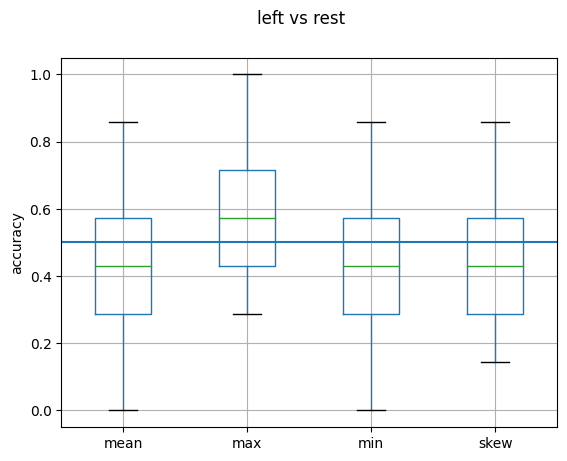

In [20]:
csp_fig, axes = plt.subplots(1)
scores_df.boxplot(ax=axes)
axes.axhline(0.5)
axes.set_ylabel('accuracy')
csp_fig.suptitle('left vs rest')
plt.show()

In [21]:
scores_df.median().to_numpy()

array([0.42857143, 0.57142857, 0.42857143, 0.42857143])